# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

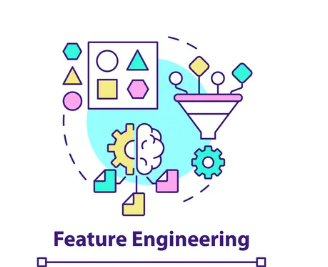

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [2]:
# Write your solution here
import pandas as pd
ndf = pd.read_csv('loan_train.csv')
ndf.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
ndf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#visualizing 
ndf_numeric = ndf.select_dtypes(exclude = ['object'])
ndf_numeric

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [7]:
#checking missing values 
ndf_numeric.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [8]:
#Handle missing value
from sklearn.impute import SimpleImputer

#creating an object for simple impute
si = SimpleImputer()

#impute all the numeric features
data = si.fit_transform(ndf_numeric)

#converting the data types
numericdf = pd.DataFrame(data, columns = ndf_numeric.columns) 
#printing the data values 
numericdf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

In [9]:
#Write your solution here
import sklearn
import matplotlib.pyplot as plt

y  = ndf_numeric.ApplicantIncome.value_counts()
print(y)


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


C:\Users\Khams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

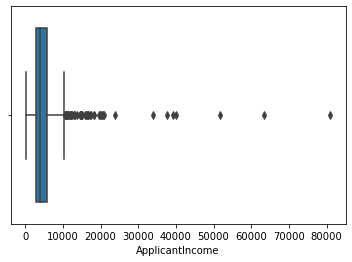

In [10]:
#creating dataframes
import seaborn as sns
sns.boxplot(numericdf.ApplicantIncome)


In [11]:
Q1 = numericdf.ApplicantIncome.quantile(0.25)
Q3 = numericdf.ApplicantIncome.quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 + (IQR * 1.5)

numericdf.shape



(614, 5)

In [12]:
numericdf1 = numericdf[(numericdf.ApplicantIncome > lowerlimit) & (numericdf.ApplicantIncome < upperlimit)]
numericdf1.shape

(47, 5)

C:\Users\Lab-3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

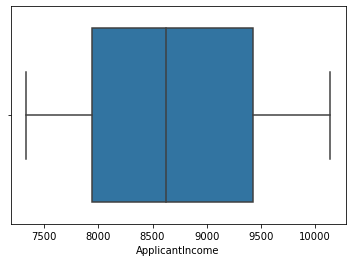

In [10]:
#standard deviation

std = numericdf.ApplicantIncome.std()
mean = numericdf.ApplicantIncome.mean()
upperlimit = mean + (3 * std)
lowerlimit = mean + (3 * std)
numericdf2 = numericdf[(numericdf.ApplicantIncome > lowerlimit) & (numericdf.ApplicantIncome < upperlimit)]

sns.boxplot(numericdf1.ApplicantIncome)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

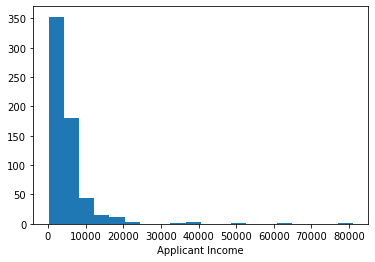

In [13]:
# Write your solution here
import matplotlib.pyplot as plt

plt.hist(numericdf.ApplicantIncome, bins=20)
plt.xlabel("Applicant Income")
plt.show()




### 1. Logarithmic Transformation


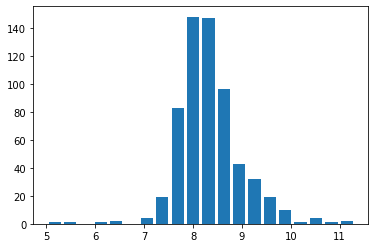

In [14]:
import numpy as np
x = np.log(numericdf['ApplicantIncome'])
plt.hist(x, bins=20, rwidth = 0.8)
plt.show()

### 2. Square root transformation

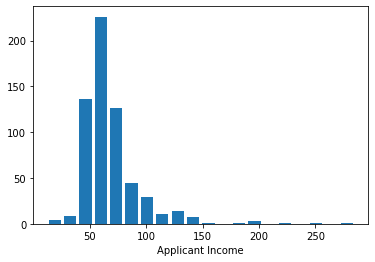

In [15]:

x = np.sqrt(numericdf.ApplicantIncome)
plt.hist(x, bins=20, rwidth = 0.8)
plt.xlabel("Applicant Income")
plt.show()

### 3. Reciprocal Transformation

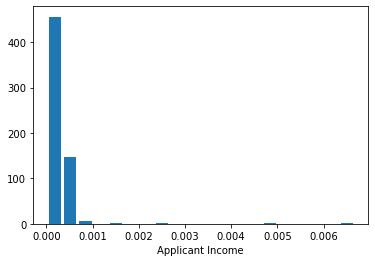

In [16]:
x = np.reciprocal(numericdf.ApplicantIncome)
plt.hist(x, bins=20, rwidth = 0.8)
plt.xlabel("Applicant Income")
plt.show()

### 4. Cube root Transformation

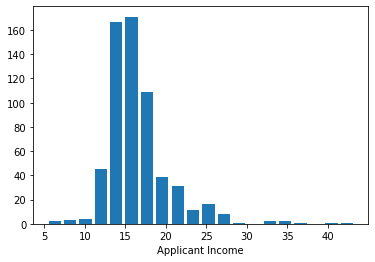

In [19]:
x = np.cbrt(numericdf.ApplicantIncome)
plt.hist(x, bins=20, rwidth = 0.8)
plt.xlabel("Applicant Income")
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [14]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(numericdf)
minmax = pd.DataFrame(numeric, columns=numericdf.columns)
minmax

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.089725          0.743590   
610         0.048930           0.000000    0.044863          0.358974   
611         0.097984           0.005760    0.353111          0.743590   
612         0.091936           0.000000    0.257598          0.743590   
613         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [15]:
# Write your solution here
categorical_cols = ndf.select_dtypes(include = ['object'])
impute = SimpleImputer(strategy = 'most_frequent')
data = impute.fit_transform(categorical_cols)
cdf = pd.DataFrame(data, columns=categorical_cols.columns)
cdf.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [18]:
#Write your solution here
data = (cdf, numericdf)
alldf = pd.concat(data)
alldf.isna().sum()



Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
Property_Area        614
Loan_Status          614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
dtype: int64

# <center>THANK YOU